# Δεδομένα Πειράματος και Διαλογή Εικόνων
## Ορισμός των μεταβλητών συστήματος 
1. Οι εικόνες βρίσκονται στο dir `/data/raw`
2. το notebook `01-data_access.ipynb` βρίσκεται στο `/notebooks`
3. οπότε για να έχουμε πρόσβαση πρέπει να μεταφερθούμε στο root project directory

### Δομή package 
- `src`
    - `data`
    - `features`
    - `models`
    - `visualization`
    
### Αρχικοποίηση Notebook
- καταχωρούμε αν δεν έχουμε ήδη στο σύστημα το directory του project
- δίνουμε πρόσβαση στο σύστημα για το πχ `C:\Users\plouk\Adiposer`
- Το σύστημα για την ώρα βρίσκεται στο `C:\Users\plouk\anaconda3\python.exe`

In [14]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
module_path

'C:\\Users\\plouk\\Adiposer'

In [17]:
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline
from celluloid import Camera
from IPython.display import HTML # to show the animation in Jupyter
from tqdm import tqdm
from glob import glob
from src.features import mouse_detection
from skimage.exposure import histogram
from skimage.util import img_as_ubyte

HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/S_f2qV2_U00?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>')

C:\Users\plouk\anaconda3\lib\site-packages\IPython\core\display.py:717: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


36it [00:00, 97.30it/s] 


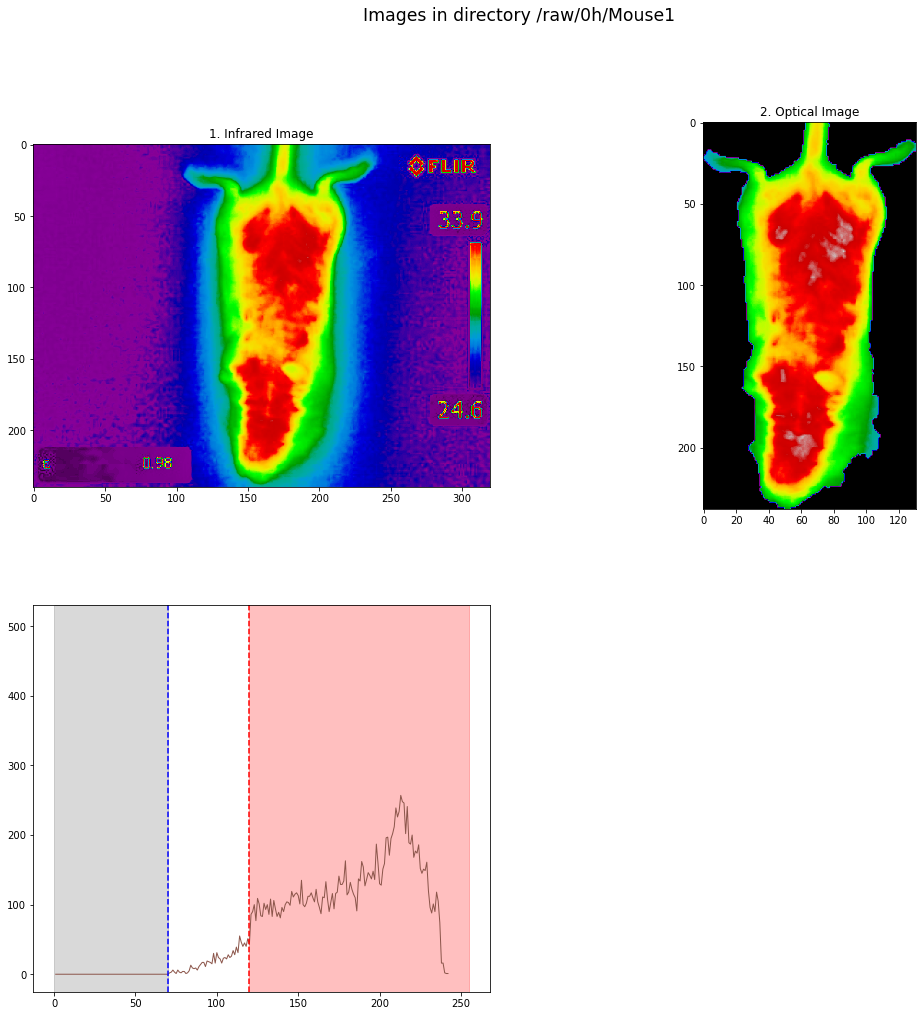

In [18]:
infrared_images = []
items = glob(module_path + '/data/raw/0h/Mouse1/IR_*')

for item in items:
    infrared_images.append(imread(fname=item, as_gray=True))
markerBack, markerBody = 70, 120
new_images = mouse_detection.mouse_detection(infrared_images, markerBack, markerBody)

fig = plt.figure(figsize=(18, 16), constrained_layout=False)
fig.suptitle(t='Images in directory /raw/0h/Mouse1', fontsize='xx-large')
grid = fig.add_gridspec(nrows=2, ncols=2, wspace=0.2, hspace=0.25)
ax0 = fig.add_subplot(grid[0])
ax1 = fig.add_subplot(grid[1])
ax2 = fig.add_subplot(grid[2])

camera = Camera(fig)
for b, c in tqdm(zip(infrared_images, new_images)):
    ax0.imshow(X=b, cmap=plt.cm.nipy_spectral)
    ax0.set_title(label='1. Infrared Image')
    fig.add_subplot(ax0)
    
    ax1.imshow(X=c, cmap=plt.cm.nipy_spectral)
    ax1.set_title(label='2. Optical Image')
    fig.add_subplot(ax1)
    
    #ax.set_title(label='1. Original Thermal Image')
    histCut, histCut_centers = histogram(img_as_ubyte(c))
    ax2.plot(histCut_centers[1:], histCut[1:], lw=1)
    fig.add_subplot(ax2)
    ax2.axvline(x=markerBody, color='red', linestyle='--')
    ax2.axvline(x=markerBack, color='blue', linestyle='--')
    ax2.axvspan(xmin=markerBody, xmax=255, color='red', alpha=0.25)
    ax2.axvspan(xmin=0, xmax=markerBack, color='black', alpha=0.15)
    
    camera.snap()
animation = camera.animate()
# το HTML πρέπει να τρέχει στο jupyter notebook 
HTML(animation.to_html5_video()) # displaying the animation

In [22]:
items.length()

AttributeError: 'list' object has no attribute 'length'